<a href="https://colab.research.google.com/github/WilliamYkZhang/ComparisonNN/blob/master/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from data import process_data
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt

In [0]:
def generate_images(history, model_type):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('{}_Accuracy.png'.format(model_type))

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.savefig('{}_Loss.png'.format(model_type))

In [0]:
def LSTM(x_train, y_train, x_test, y_test, shuffle=False, batch_size=64):
    model_type = "LSTM"
    model_saver = ModelCheckpoint(filepath='/{}.h5'.format(model_type),
                                  monitor='val_loss', save_best_only=True, save_weights_only=False,
                                  mode='auto', save_freq='epoch')
    # model_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=3, verbose=0)
    regressor = Sequential()
    regressor.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    regressor.add(Dropout(0.4))
    regressor.add(LSTM(units=256, return_sequences=False))
    regressor.add(Dropout(0.3))
    regressor.add((Dense(units=256)))
    regressor.add(Dropout(0.3))
    regressor.add(Dense(units=y_train.shape[1]))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

    history = regressor.fit(x=x_train, y=y_train, epochs=100, batch_size=batch_size,
                            validation_data=(x_test, y_test), shuffle=shuffle,
                            callbacks=[model_saver],
                            verbose=2
                            )
    # regressor.save('models/{}.h5'.format(model_type))
    return regressor, history, model_type

In [0]:
def FFNN(x_train, y_train, x_test, y_test, shuffle=False, batch_size=64):
    model_type = "FFNN"
    model_saver = ModelCheckpoint(filepath='/{}.h5'.format(model_type),
                                  monitor='val_loss', save_best_only=True, save_weights_only=False,
                                  mode='auto', save_freq='epoch')
    # model_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=3, verbose=0)

    regressor = Sequential()
    regressor.add(Dense(units=256))
    regressor.add(Dropout(0.4))
    regressor.add(Dense(units=256))
    regressor.add(Dropout(0.3))
    regressor.add((Dense(units=256)))
    regressor.add(Dropout(0.3))
    regressor.add(Dense(units=y_train.shape[1]))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

    history = regressor.fit(x=x_train, y=y_train, epochs=100, batch_size=batch_size,
                            validation_data=(x_test, y_test), shuffle=shuffle,
                            callbacks=[model_saver],
                            verbose=2
                            )
    # regressor.save('models/{}.h5'.format(model_type))
    return regressor, history, model_type

In [0]:
def RNN(x_train, y_train, x_test, y_test, shuffle=False, batch_size=64):
    model_type = "RNN"
    model_saver = ModelCheckpoint(filepath='/{}.h5'.format(model_type),
                                  monitor='val_loss', save_best_only=True, save_weights_only=False,
                                  mode='auto', save_freq='epoch')
    # model_stopper = EarlyStopping(monitor='val_loss', min_delta=0.0, patience=3, verbose=0)

    regressor = Sequential()
    regressor.add(SimpleRNN(units=256, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    regressor.add(Dropout(0.4))
    regressor.add(SimpleRNN(units=256, return_sequences=False))
    regressor.add(Dropout(0.3))
    regressor.add((Dense(units=256)))
    regressor.add(Dropout(0.3))
    regressor.add(Dense(units=y_train.shape[1]))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

    history = regressor.fit(x=x_train, y=y_train, epochs=100, batch_size=batch_size,
                            validation_data=(x_test, y_test), shuffle=shuffle,
                            callbacks=[model_saver],
                            verbose=2
                            )
    # regressor.save('models/{}.h5'.format(model_type))
    return regressor, history, model_type

In [0]:
batch_size = 64
shuffle = False

x_train: (3968, 3), y_train: (3968, 3)
x_test:(960, 3), y_test:(960, 3)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 3968 samples, validate on 960 samples
Epoch 1/100
3968/3968 - 1s - loss: 5.8148e-04 - acc: 0.3425 - val_loss: 2.4498e-04 - val_acc: 0.2937
Epoch 2/100
3968/3968 - 0s - loss: 5.3490e-04 - acc: 0.3372 - val_loss: 2.3771e-04 - val_acc: 0.2948
Epoch 3/100
3968/3968 - 0s - loss: 5.2349e-04 - acc: 0.3377 - val_loss: 2.3049e-04 - val_acc: 0.2937
Epoch 4/100
3968/3968 - 0s - loss: 5.1482e-04 - acc: 0.3526 - val_loss: 2.1358e-04 - val_acc: 0.2937
Epoch 5/100
3968/3968 - 0s - loss: 5.1258e-04 - acc: 0.3327 - val_loss: 2.1916e-04 - val_acc: 0.2937
Epoch 6/100
3968/3968 - 0s - loss: 5.0816e-04 - acc: 0.3367 - val_loss: 2.2012e-04 - val_acc: 0.2937
Epoch 7/100
3968/3968 - 0s - loss: 5.0003e-04 - acc: 0.3498 - val_loss: 2.1844e-04 - val_acc: 0.2948
Epoch 8/100
3968/3968 - 0s - loss: 5.0289e-04 - acc: 0.3364 - val_loss: 2.2197e-04 - val_acc:

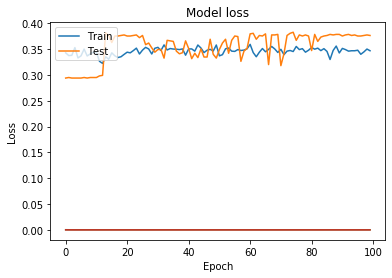

In [7]:
x_train, y_train, x_test, y_test = process_data(path='joined_close_stocks.csv', time_series=False, debug=True, batch_size=batch_size, shuffle=shuffle)
model, history, model_type = FFNN(x_train, y_train, x_test, y_test)
generate_images(history, model_type)


length of time-series i/o (4940, 50, 3)
x_train: (3968, 50, 3), y_train: (3968, 3)
x_test:(960, 50, 3), y_test:(960, 3)
Train on 3968 samples, validate on 960 samples
Epoch 1/100
3968/3968 - 3s - loss: 0.0210 - acc: 0.3490 - val_loss: 1.8600e-04 - val_acc: 0.3990
Epoch 2/100
3968/3968 - 3s - loss: 0.0017 - acc: 0.3627 - val_loss: 1.6364e-04 - val_acc: 0.4208
Epoch 3/100
3968/3968 - 3s - loss: 0.0011 - acc: 0.3710 - val_loss: 1.4638e-04 - val_acc: 0.4688
Epoch 4/100
3968/3968 - 3s - loss: 8.9718e-04 - acc: 0.3574 - val_loss: 1.3362e-04 - val_acc: 0.5073
Epoch 5/100
3968/3968 - 3s - loss: 7.8824e-04 - acc: 0.3669 - val_loss: 1.2680e-04 - val_acc: 0.4344
Epoch 6/100
3968/3968 - 3s - loss: 6.7189e-04 - acc: 0.3919 - val_loss: 1.0692e-04 - val_acc: 0.4750
Epoch 7/100
3968/3968 - 3s - loss: 6.0747e-04 - acc: 0.3873 - val_loss: 9.3769e-05 - val_acc: 0.4406
Epoch 8/100
3968/3968 - 3s - loss: 5.4215e-04 - acc: 0.4027 - val_loss: 8.8341e-05 - val_acc: 0.4260
Epoch 9/100
3968/3968 - 3s - loss: 4

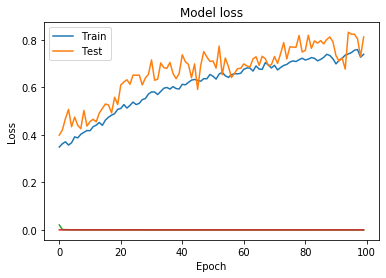

In [8]:
x_train, y_train, x_test, y_test = process_data(path='joined_close_stocks.csv', time_series=True, debug=True, batch_size=batch_size, shuffle=shuffle)
model, history, model_type = RNN(x_train, y_train, x_test, y_test)
generate_images(history, model_type)

In [7]:
x_train, y_train, x_test, y_test = process_data(path='joined_close_stocks.csv', time_series=True, debug=True, batch_size=batch_size, shuffle=shuffle)
model, history, model_type = LSTM(x_train, y_train, x_test, y_test)
generate_images(history, model_type)


length of time-series i/o (4940, 50, 3)
x_train: (3968, 50, 3), y_train: (3968, 3)
x_test:(960, 50, 3), y_test:(960, 3)


TypeError: ignored

In [9]:
regressor = Sequential()
regressor.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
regressor.add(Dropout(0.4))
regressor.add(LSTM(units=256, return_sequences=False))
regressor.add(Dropout(0.3))
regressor.add((Dense(units=256)))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=y_train.shape[1]))
regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

TypeError: ignored

In [1]:
!pip show tensorflow  # 1.6.0
!pip show keras  # 2.1.5

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: keras-applications, absl-py, numpy, tensorflow-estimator, wrapt, keras-preprocessing, wheel, termcolor, gast, google-pasta, tensorboard, six, protobuf, opt-einsum, grpcio, astor
Required-by: stable-baselines, magenta, fancyimpute
Name: Keras
Version: 2.1.2
Summary: Deep Learning for Python
Home-page: https://github.com/fchollet/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, six, numpy, pyyaml
Required-by: textgenrnn, keras-vis, kapre, fancyimpute


In [9]:
!pip uninstall keras
!pip install keras==2.1.2

Uninstalling Keras-2.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.5
     |████████████████████████████████| 307kB 6.6MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.2 which is incompatible.


In [15]:
!pip show tensorflow  # 1.6.0
!pip show keras  # 2.1.5

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: six, gast, grpcio, numpy, astor, termcolor, tensorboard, wrapt, google-pasta, keras-applications, protobuf, tensorflow-estimator, absl-py, wheel, opt-einsum, keras-preprocessing
Required-by: stable-baselines, magenta, fancyimpute
Name: Keras
Version: 2.1.2
Summary: Deep Learning for Python
Home-page: https://github.com/fchollet/keras
Author: Francois Chollet
Author-email: francois.chollet@gmail.com
License: MIT
Location: /usr/local/lib/python3.6/dist-packages
Requires: pyyaml, scipy, six, numpy
Required-by: textgenrnn, keras-vis, kapre, fancyimpute
